 In the terminal, ran the following command to assemble bacterial genome. Output file includes contigs and scaffolds.
 
     spades.py -o lab8-claire/output --pacbio /data/lab8/pacbio_reads.fastq -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq -t 1

Using the assembly-stats program in terminal, calculated statistics on both contigs and scaffolds file:

    assembly-stats contigs.fasta scaffolds.fasta

Total length of all contigs: 6678635

Total length of all scaffolds: 6678655 

Number of contigs: 176

Number of scaffolds: 174

N50 contigs: 234690

N50 scaffolds: 234690

Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length?

    N50 is the minimum contig/scaffold length to cover 50% of the genome, which if different from the mean or median length in that it relates back to the genome we're studying, rather than just the length of what the program was able to assemble. N50 helps us understand the power of the assembly in the context of the genome.

In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?
    
    Scaffolds are approximately equal to contigs in average length (scaffolds are about 400bp larger, but thats a pretty insignificant difference).

Extra Credit:The number of times a contig in your assembly was covered by the reads used to assemble it (“coverage”) is listed at the end of the contig name in contigs.fasta. Extract the coverage from each FASTA header and plot a histogram of coverage for all contigs in your assembly.

first plot = showing outlier values at coverage = 150 and 1536.0
second plot = zoomed in on majority of data


Text(0, 0.5, 'frequency')

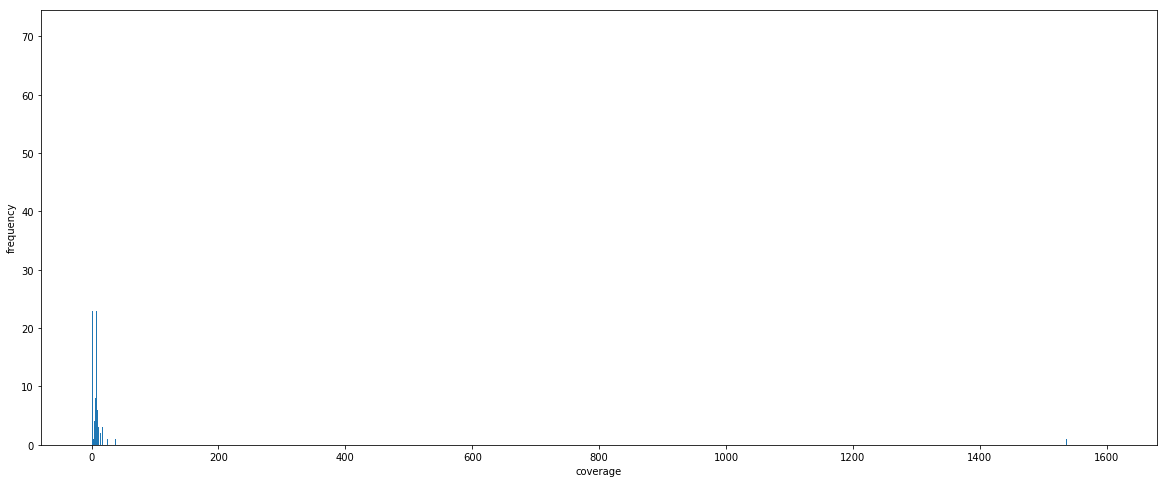

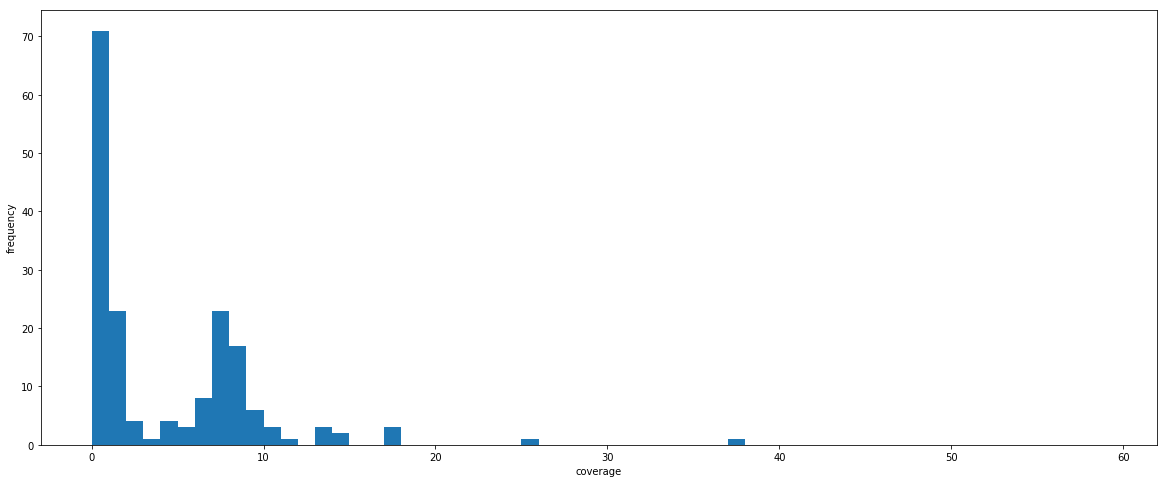

In [4]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

cov = np.array([])
for record in SeqIO.parse("output/contigs.fasta", "fasta"):
    cov = np.append(cov, float(record.id.split('cov_')[1]))
print('first plot = showing outlier values at coverage = 150 and '  + str(cov.max()))
plt.figure(figsize=(20,8))
plt.hist(cov, bins=np.arange(1600))
plt.xlabel('coverage')
plt.ylabel('frequency')

print('second plot = zoomed in on majority of data')
plt.figure(figsize=(20,8))
plt.hist(cov, bins=np.arange(60))
plt.xlabel('coverage')
plt.ylabel('frequency')


Is coverage uniformly distributed? Does it look Gaussian? Is it bimodalor trimodal?

    Coverage is not uniformly distributed or normally distributed. Coverage is skewed right, and the majority of the data are bimodal and between 0 and 20.

What explains the presence of contigs with coverage an integer multiple of the mean coverage?

    These contigs were probably duplicates of other contigs, and the integer is the number of duplicates.

Locating rRNA genes via terminal:
    
    rna_hmm3.py -i contigs.fasta -o output.gff
    
Manually deleted all lines in output.gff that were not 16S.

Pulled nucleotide sequence for 16S rRNA genes via terminal, saved output as 16S.fasta:

    bedtools getfasta -fi contigs.fasta -bed output.gff

Ran 16S.fasta through SeqMatch (http://rdp.cme.msu.edu/seqmatch/seqmatch_intro.jsp):

Genus level identification: Pseudomonas

Each of the 6 16S RNA nucleotide sequences came up as a match for the genus Pseudomonas, so I am confident that this is the correct genus. There was no species output.

## BASys genome annotation data

<img src="psuedomonas%20genome%20map.PNG">  
The above is the **BAsys genome annotation map** for our supplied genome. The following is a commentary on the summary statistics provided:  
<img src="AA_acid_length.PNG">
This image shows that the modal protein length is around 200 AAs, and that the median size is likely closer to 300.   
<img src="prot_location.PNG">
This image shows the majority of the proteins produced are localized to (in descending order of frequency), the cytoplasm, the membrane, the cell inner membrane  
<img src="prot_func.PNG">
This image shows the functions of the listed proteins. It appears that 40% of the genes are of unknown function, it appears that the next highest category is transcription (8.1% of genome), then energy production and conversion (7.2%).   

## RAST Genome Annotation Data

<img src="RASTannotate.PNG">


## Research and Write-up

Claire Dubin and Anagh Sinha  
  
  
Siderophores are a class of small molecules that are high-affinity iron-chelating compounds. They are secreted by our genus Pseudomonas as well as other microorganisms such as bacteria and fungi. Their primary function is the transport of ion across the cell membrane, and their affinity to Ferric Iron (Fe3+) is among the highest of any known small molecules.
  
The Pseudomonas genome, as annotated by RAST, contains 20 genes responsible for iron uptake and metabolism. Some of the genes are genes for Iron acquisition in Streptococcus. The presence of Streptococcus iron acquisition genes in addition to Pseudomonas’ own iron acquisition genes appears to be a competitive adaptation in members of genus Pseudomonas . It would allow them to deprive members of Streptococcus from sustaining biological processes relying on Iron. 
  
So why do members of Pseudomonas encode so many of their own siderophores? And why do they also encode iron acquisition genes from members of Streptococcus? The answers to both these questions become clear when we consider this information in the context of multipathogenic infection of mammals by Pseudomonas and Streptococcus. There is extensive literature on the use of iron deprivation as a mammalian defense tactic against microbes [1]. The role of Pseudomonas as a bacteria that can cause infection in immunocompromised individuals is also well documented. To successfully invade the mammalian host, Pseudomonas needs to acquire substantial Iron to quickly expand its population [2]. However, iron uptake is dramatically increased by the host machinery when under threat of invading pathogens. Thus, Pseudomonas creates siderophores that, as small molecules, quickly bypass the cell membrane and ‘snatch’ host iron using their superior affinity. In addition, as it is specialised for invasion of immunocompromised individuals, Pseudomonas is specialized to compete against other opportunistic organisms like members of genus Streptococcus, starving other microbes of iron as well [3]. Additionally, because Pseudomonas is able to mutate rapidly, communities of Pseudomonas can quickly specialize into the complementary roles of siderophore-producing and non siderophore-producing bacteria [4]. This allows the non-siderophore bacteria to specialize by saving energy, increasing the potential to outcompete other pathogens in multipathogenic infection and to further cripple the host defense machinery. 
  
Sources:
1. Ganz, Thomas. “Regulation of Iron Acquisition and Iron Distribution in Mammals.” NeuroImage, Academic Press, 12 May 2006, www.sciencedirect.com/science/article/pii/S0167488906001029.  
2. Meyer JM, Neely A, Stintzi A, Georges C, Holder IA. 1996. Pyoverdine is essential for virulence of Pseudomonas aeruginosa. Infect Immun 64:518–523 https://iai.asm.org/content/64/2/518?ijkey=4ee2eb87ad96e8998784dc60d85ffeea1b5f3366&keytype2=tf_ipsecsha
3. Nguyen, Angela T., et al. “Iron Depletion Enhances Production of Antimicrobials by Pseudomonas Aeruginosa.” Journal of Bacteriology, American Society for Microbiology Journals, 15 July 2015, jb.asm.org/content/197/14/2265#ref-11.https://jb.asm.org/content/197/14/2265#ref-11
4. Harrison, Freya; Browning, Lucy E.; Vos, Michiel; Buckling, Angus (2006-01-01). "Cooperation and virulence in acute Pseudomonas aeruginosainfections". BMC Biology. 4: 21. doi:10.1186/1741-7007-4-21. https://bmcbiol.biomedcentral.com/articles/10.1186/1741-7007-4-21